# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Imports 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [17]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

image_index = 1 # pick a specific image
image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Visualise data

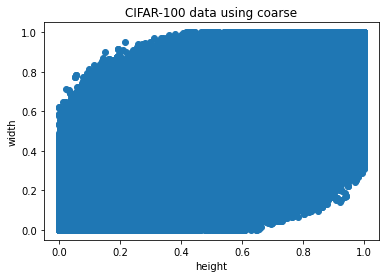

In [18]:
plt.scatter(images[:,0], images[:,1])

# Add title and axis names
plt.title('CIFAR-100 data using coarse')
plt.xlabel('height')
plt.ylabel('width')
plt.show()

# CNN

## Expland the data to include a channel dimension for CNN. As images are greyscale add one additional axis in the last dimension of our data

In [19]:
print(images.shape)
images = np.expand_dims(images, axis=(4))
print(images.shape)

(32, 32, 3, 50000)
(32, 32, 3, 50000, 1)


### Normalise the data

In [20]:
images = np.divide(images, 255)

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images, label_fine, epochs=10, 
                    validation_data=(images, label_fine))

ValueError: Data cardinality is ambiguous:
  x sizes: 32
  y sizes: 50000
Make sure all arrays contain the same number of samples.

### Plot models traing curves 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images,  images_fine, verbose=2)

print(test_acc)